## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [11]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [12]:
# Combine the data into a single dataset

merged_data_df=pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")


In [13]:
# Display the data table for preview
merged_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
# num_Mice =merged_data_df["Mouse ID"].count()
# num_Mice

len(np.unique(merged_data_df["Mouse ID"]))


249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data_df[merged_data_df.duplicated(['Mouse ID', 'Timepoint'])]


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data_df.drop( merged_data_df[merged_data_df['Mouse ID']== 'g989'].index, inplace=True)

In [18]:

#the number of rows decreased by 13 due to duplicates (1893 to 1880 rows)
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
len(merged_data_df)

1880

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#merged_data_df.describe() stats overall


In [21]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

merged_data_regimen_df=merged_data_df.groupby('Drug Regimen')
merged_data_regimen_df.count().head(20)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [22]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol= merged_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor_vol= merged_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_tumor_vol=merged_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_tumor_vol=merged_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM_tumor_vol= merged_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean": mean_tumor_vol, "Median": median_tumor_vol, "Variance": var_tumor_vol, "Standard Deviation": std_tumor_vol, "SEM": SEM_tumor_vol})


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Using the aggregation method, produce the same summary statistics in a single line
merged_data_regimen_df.agg(Mean=('Tumor Volume (mm3)', np.mean), \
                           Median=('Tumor Volume (mm3)', np.median ), \
                           Variance = ('Tumor Volume (mm3)', np.var ), \
                           Standard_Deviation = ('Tumor Volume (mm3)', np.std),\
                           SEM = ('Tumor Volume (mm3)', st.sem)) 

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

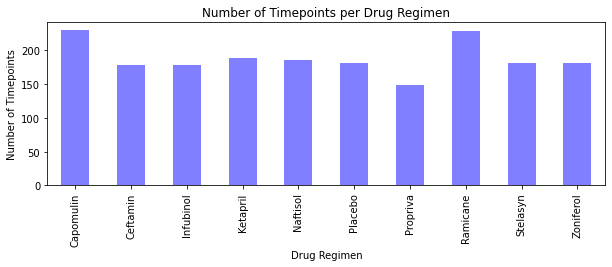

<Figure size 432x288 with 0 Axes>

In [26]:
plot_data = pd.DataFrame(merged_data_df.groupby(["Drug Regimen"]).count()).reset_index()
new_df = plot_data[["Drug Regimen", "Timepoint"]]
new_df = new_df.set_index("Drug Regimen") 

new_df.plot(kind="bar",color='b',alpha=0.5, figsize=(10,3), legend=False)

plt.title("Number of Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()
plt.tight_layout()

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [28]:
Regimen_list = summary_df.index.tolist()
Regimen_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [29]:
Timepoints = (merged_data_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
Timepoints

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

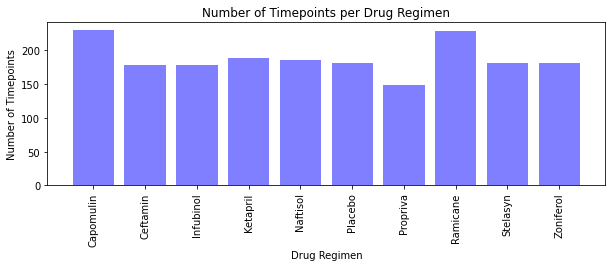

In [30]:

plt.figure(figsize=(10,3))
plt.bar(Regimen_list, Timepoints, color='b', alpha=0.5, align="center", )


plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

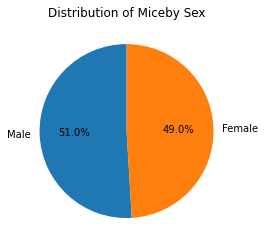

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = merged_data_df['Sex'].value_counts()
data

pie = data.plot.pie(autopct="%1.1f%%", startangle=90, title = 'Distribution of Miceby Sex')
pie.set_ylabel('')
plt.show()

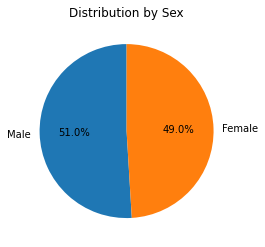

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
